# Pandas Introduction #

* Data analysis / transformation tool
* Closely related to R's concept of data frames
* Useful in ETL processes
* Ideal for data that fits into memory (though wrappers/functions make it possible to use on terabytes of data with more work)
* Can think of it as an in-memory SQL table in some ways

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import io
import matplotlib
import matplotlib.pyplot as plt
import pylab
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

def print_spacer():
    print('\n' + '-'*10 + '\n')
    
def print_methods(obj):
    print(', '.join(f for f in dir(obj) if not f.startswith('_')))

<br/>

---

<br/>

# Core data structures #

## Series ##

* Typed, indexed array
* Usually numpy arrays under the hood

In [2]:
# simple series creation
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
# datatype is inferred by default
pd.Series([2.3, 2, -0.323])

0    2.300
1    2.000
2   -0.323
dtype: float64

In [4]:
# datatype can also be explicitly given
pd.Series([0.01, 2, 3], dtype='float16')

0    0.010002
1    2.000000
2    3.000000
dtype: float16

In [5]:
# 'object' type is used for strings or any type of python object (less efficient)
pd.Series(['foo', 'bar', ('foo', 22), 22.3, [1,2,3,4,5], {'x': 'y'}])

0                foo
1                bar
2          (foo, 22)
3               22.3
4    [1, 2, 3, 4, 5]
5         {'x': 'y'}
dtype: object

In [6]:
# 'category' type useful for enums, big memory saving over strings
pd.Series(['foo', 'foo', 'bar', 'foo', 'bar'], dtype='category')

0    foo
1    foo
2    bar
3    foo
4    bar
dtype: category
Categories (2, object): [bar, foo]

In [7]:
# 'bool' type for true/false values
print(pd.Series([True, True, False]))

pd.Series([1, 0, 0], dtype='bool')

0     True
1     True
2    False
dtype: bool


0     True
1    False
2    False
dtype: bool

In [8]:
# can specify custom index, and name for the series (useful when adding to DataFrames)
print(pd.Series([1,2,3], index=['a', 'b', 'c'], name='Albert'))
pd.Series(['x', 'y', 'z'], index=[93, 104, 2])

a    1
b    2
c    3
Name: Albert, dtype: int64


93     x
104    y
2      z
dtype: object

In [9]:
# can reassign indexes from Series, arrays, etc.
s = pd.Series([1,2,3])
print(s)

print_spacer()

s.index = ['a', 'b', 'c']
print(s)

print_spacer()

s.index = pd.Series([4, 3, 2])
print(s)

0    1
1    2
2    3
dtype: int64

----------

a    1
b    2
c    3
dtype: int64

----------

4    1
3    2
2    3
dtype: int64


In [10]:
# can create joint indexes
index_vals = [('Aistemos', 'tech'),
              ('Aistemos', 'sales'),
              ('Bose', 'tech'),
              ('TR', 'sales'),
              ('TR', 'marketing'),
              ('TR', 'tech')]
index = pd.MultiIndex.from_tuples(index_vals, names=['company', 'division'])
pd.Series([1,2,3,4,5,6], index=index)

company   division 
Aistemos  tech         1
          sales        2
Bose      tech         3
TR        sales        4
          marketing    5
          tech         6
dtype: int64

In [11]:
# indexes have their own object type, and a bunch of methods (I won't go into them here)
index = pd.Series([1,2,3]).index
print(index)

print_spacer()

print_methods(index)

RangeIndex(start=0, stop=3, step=1)

----------

T, all, any, append, argmax, argmin, argsort, asi8, asof, asof_locs, astype, base, copy, data, delete, diff, difference, drop, drop_duplicates, dtype, dtype_str, duplicated, equals, factorize, fillna, flags, format, from_range, get_duplicates, get_indexer, get_indexer_for, get_indexer_non_unique, get_level_values, get_loc, get_slice_bound, get_value, get_values, groupby, has_duplicates, hasnans, holds_integer, identical, inferred_type, insert, intersection, is_, is_all_dates, is_boolean, is_categorical, is_floating, is_integer, is_lexsorted_for_tuple, is_mixed, is_monotonic, is_monotonic_decreasing, is_monotonic_increasing, is_numeric, is_object, is_type_compatible, is_unique, isin, item, itemsize, join, map, max, memory_usage, min, name, names, nbytes, ndim, nlevels, nunique, order, putmask, ravel, reindex, rename, repeat, searchsorted, set_names, set_value, shape, shift, size, slice_indexer, slice_locs, sort, sort_values, sortlevel, st

<br/>

---

<br/>

## Working with Series data ##

In [12]:
s = pd.Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [13]:
# by index - returns single int64
print(s[0])

10


In [14]:
# note that return type isn't `int`
type(s[0])

numpy.int64

In [15]:
# by range - returns new Series
s[1:3]

1    20
2    30
dtype: int64

### Vectorised operations ###

* Most methods on Series
* +, -, *, etc.
* Usually return copy of Series

In [16]:
s = pd.Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [17]:
# Series and scalar operation adds scalar to each element in Series
s + 1

0    2
1    3
2    4
3    5
dtype: int64

In [18]:
# Series and another Series operation applies elementwise
s * s

0     1
1     4
2     9
3    16
dtype: int64

In [19]:
# Shorthand for modifying in place also work
s *= 2
s

0    2
1    4
2    6
3    8
dtype: int64

### Boolean arrays ###

* Returned by certain operations on Series
* Can be used for indexing/counting
* Returns Series with 'bool' datatype, index is same as original Series

In [20]:
s = pd.Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [21]:
# equality
s == 20

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [22]:
# gt, lt, ge, le, etc.
s >= 20

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [23]:
# boolean AND for multiple conditions
(s >= 20) & (s != 40)

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [24]:
# boolean OR for multiple conditions
(s == 10) | (s > 40)

0     True
1    False
2    False
3    False
4     True
dtype: bool

In [25]:
# boolean arrays can be used to index elements from Series
s = pd.Series([1.0, -0.01, -0.5, 0.3, 0.7])
s

0    1.00
1   -0.01
2   -0.50
3    0.30
4    0.70
dtype: float64

In [26]:
# get new Series containing bool for each element that matches
gt_zero_bools = s > 0
gt_zero_bools

0     True
1    False
2    False
3     True
4     True
dtype: bool

In [27]:
# use bool Series to index original
s[gt_zero_bools]

0    1.0
3    0.3
4    0.7
dtype: float64

In [28]:
# more usual to just do the middle step in-line
s[s > 0]

0    1.0
3    0.3
4    0.7
dtype: float64

In [29]:
s[(s > 0) & (s < 0.8) | (s == -0.01)]

1   -0.01
3    0.30
4    0.70
dtype: float64

### Type conversion ###

* Implicitly occurs with some operations (e.g. int / float -> float)
* Use `astype` method for explicit conversion

In [30]:
s = pd.Series([-500, 0, 500])
s

0   -500
1      0
2    500
dtype: int64

In [31]:
# using smaller types is usually slower, but save memory
print('int64:', s.nbytes, 'bytes')
print('int16:', s.astype('int16').nbytes, 'bytes')
s.astype('int16')

int64: 24 bytes
int16: 6 bytes


0   -500
1      0
2    500
dtype: int16

In [32]:
# beware of overflow
s.astype('uint8')

0     12
1      0
2    244
dtype: uint8

In [33]:
# usually has sensible results for -> bool conversions
s.astype('bool')

0     True
1    False
2     True
dtype: bool

## Series methods ##

* Many convenience methods available: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html
* min, max, count, mean, etc.

In [34]:
print_methods(s)

T, abs, add, add_prefix, add_suffix, align, all, any, append, apply, argmax, argmin, argsort, as_blocks, as_matrix, asfreq, asof, astype, at, at_time, autocorr, axes, base, between, between_time, bfill, blocks, bool, clip, clip_lower, clip_upper, combine, combine_first, compound, compress, consolidate, convert_objects, copy, corr, count, cov, cummax, cummin, cumprod, cumsum, data, describe, diff, div, divide, dot, drop, drop_duplicates, dropna, dtype, dtypes, duplicated, empty, eq, equals, ewm, expanding, factorize, ffill, fillna, filter, first, first_valid_index, flags, floordiv, from_array, from_csv, ftype, ftypes, ge, get, get_dtype_counts, get_ftype_counts, get_value, get_values, groupby, gt, hasnans, head, hist, iat, idxmax, idxmin, iget, iget_value, iloc, imag, index, interpolate, irow, is_copy, is_time_series, is_unique, isin, isnull, item, items, itemsize, iteritems, iterkv, ix, keys, kurt, kurtosis, last, last_valid_index, le, loc, lt, mad, map, mask, max, mean, median, memory

<br/>

---

<br/>

## DataFrame ##

* Basically combines a bunch of Series into a tabular structure
* Each column is a Series
* Very similar to working with Series (i.e. similar methods, similar indexing)

### DataFrame creation ###

* Functions for creating from almost anything

In [35]:
# create from arrays
pd.DataFrame([['alice', 23],
              ['bob', 10],
              ['caroline', 44]])

,0,1
0,alice,23
1,bob,10
2,caroline,44


In [36]:
# but nicer to specify column names
pd.DataFrame([['alice', 23],
              ['bob', 10],
              ['caroline', 44]],
             columns=['name', 'age'])

,name,age
0,alice,23
1,bob,10
2,caroline,44


In [37]:
# create from dicts, column names inferred from keys
pd.DataFrame([{'name': 'alice', 'age': 23},
              {'name': 'bob', 'age': 10},
              {'name': 'caroline', 'age': 44}])

,age,name
0,23,alice
1,10,bob
2,44,caroline


In [38]:
# from CSV (pandas CSV parsing is REALLY good - faster than python's `csv` module, better handling of messy data)

# pandas `read_csv` method works on file handles, so wrap string in StringIO for this demo
csv = io.StringIO("""
name,age
"alice",23
"bob",10
caroline,  44
""")
pd.read_csv(csv)

,name,age
0,alice,23
1,bob,10
2,caroline,44


In [39]:
# from JSON (works on JSON strings or file handles)
json_data = """
[{"name": "alice", "age": 23},
 {"name": "bob", "age": 10},
 {"name": "caroline", "age": 44}]
"""
pd.read_json(json_data)

,age,name
0,23,alice
1,10,bob
2,44,caroline


...and many more, including:

* read_pickle
* read_clipboard
* read_html - from HTML table
* read_hdf - from HDF5 binary format
* read_sql_table, read_sql_query
* read_excel

In [40]:
# `.info()` - useful method for showing info about a DataFrame
pd.DataFrame([[1, 'a'], [2, 'b'], [3, 'c']], columns=['X','Y']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
X    3 non-null int64
Y    3 non-null object
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


<br/>

---

<br/>

## DataFrame indexing ##

* Very similar to getting data from Series
* Some return copy of data frame, other return view on underlying

### Column name based ###

In [41]:
df = pd.read_csv(io.StringIO("""
name,age,editor
alice,23,vi
bob,10,emacs
caroline,44,vi
"""))
df

,name,age,editor
0,alice,23,vi
1,bob,10,emacs
2,caroline,44,vi


In [42]:
# getting single column returns a Series
df['age']

0    23
1    10
2    44
Name: age, dtype: int64

In [43]:
# getting multiple columns returns a DataFrame
df[['name', 'editor']]

,name,editor
0,alice,vi
1,bob,emacs
2,caroline,vi


### .loc - Label based ###

* selection through row indexer & column indexer
* supports boolean arrays
* returns value / Series / DataFrame depending on what is requested

*Note*: rows have int index here for convenience - accessing *row 0* means the row with index value 0, *not* the 1st row

In [44]:
# label based indexing: df[rows, cols]
df.loc[0, 'name'] # row 0, column 'name'

'alice'

In [45]:
# rows 0 and 2, columns 'editor' and 'age'
df.loc[[0, 2], ['editor', 'age']]

,editor,age
0,vi,23
2,vi,44


In [46]:
# using ranges (and ':' for all) is also allowed
df.loc[0:2, :] # rows 0 (inclusive) up to 2 (exclusive), all columns

,name,age,editor
0,alice,23,vi
1,bob,10,emacs
2,caroline,44,vi


In [47]:
# every other row, every other column
df.loc[::2, ::2]

,name,editor
0,alice,vi
2,caroline,vi


### .iloc - integer position based ###

* also supports boolean arrays

In [48]:
# names ignored now, can access table like a matrix
df.iloc[0, 0]

'alice'

In [49]:
df.iloc[-2:, 1:2]

,age
1,10
2,44


...also *.ix()* - mixed label/integer based indexing, but much rarer to use without good reason.

### Boolean indexing ###

* almost identical to Series boolean indexing

In [50]:
# get all rows where 'age' is > 10
df

,name,age,editor
0,alice,23,vi
1,bob,10,emacs
2,caroline,44,vi


In [51]:
# first, get boolean Series, True if row matches, False otherwise
bools = df['age'] > 10
bools

0     True
1    False
2     True
Name: age, dtype: bool

In [52]:
# then get rows where matching index in `bools` is set to True
df[bools]

,name,age,editor
0,alice,23,vi
2,caroline,44,vi


In [53]:
# again, more usual to do the above inline
df[df['age'] > 10]

,name,age,editor
0,alice,23,vi
2,caroline,44,vi


In [54]:
# get all rows where 'editor' isn't emacs, and 'age' is < 40
df[(df['editor'] != 'emacs') & (df['age'] < 40)]

,name,age,editor
0,alice,23,vi


### Iteration ###

* Try and avoid where possible, *much* slower than doing column-based operations
* Useful for e.g. custom serialisation, or very complex logic

In [55]:
# iterate over each row, returns each row as a new Series object
for idx, series in df.iterrows():
    print('index:', idx)
    print(series)
    print('--')

index: 0
name      alice
age          23
editor       vi
Name: 0, dtype: object
--
index: 1
name        bob
age          10
editor    emacs
Name: 1, dtype: object
--
index: 2
name      caroline
age             44
editor          vi
Name: 2, dtype: object
--


In [56]:
# iterate over each row as a tuple, significantly faster, no Series creation overhead
for row in df.itertuples():
    print(row)

Pandas(Index=0, name='alice', age=23, editor='vi')
Pandas(Index=1, name='bob', age=10, editor='emacs')
Pandas(Index=2, name='caroline', age=44, editor='vi')


<br/>

---

<br/>

### Modifying DataFrames ###

In [57]:
# columns are series, so elementwise vector operation work in the same way
df['age'] * 2

0    46
1    20
2    88
Name: age, dtype: int64

In [58]:
# columns can be assigned to, using Series, or things that can be converted to Series
df['age'] = [12, 100, 45]
df

,name,age,editor
0,alice,12,vi
1,bob,100,emacs
2,caroline,45,vi


In [59]:
# modification in place also available
df['age'] += 12
df

,name,age,editor
0,alice,24,vi
1,bob,112,emacs
2,caroline,57,vi


In [60]:
# new columns can be created in the same way
df['halfAge'] = df['age'] / 2
df

,name,age,editor,halfAge
0,alice,24,vi,12.0
1,bob,112,emacs,56.0
2,caroline,57,vi,28.5


In [61]:
# columns are Series, and thus have the same convenience methods available
print('sum:', df['age'].sum())
print('mean:', df['age'].mean())
print('min:', df['age'].min())

sum: 193
mean: 64.3333333333
min: 24


In [62]:
# again, can mix scalar/vector operations
df['fooAge'] = (df['age'] / df['age'].mean()) + df['halfAge'].sum() + [1,2,3]
df

,name,age,editor,halfAge,fooAge
0,alice,24,vi,12.0,97.873057
1,bob,112,emacs,56.0,100.240933
2,caroline,57,vi,28.5,100.386010


In [63]:
# can modify certain values using indexing techniques described earlier
df.loc[[0,2], 'editor'] = 'vim'
df

,name,age,editor,halfAge,fooAge
0,alice,24,vim,12.0,97.873057
1,bob,112,emacs,56.0,100.240933
2,caroline,57,vim,28.5,100.386010


In [64]:
# warning: avoid chained calls
df[df['editor'] == 'vim']['editor'] = 'vi'

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


...warning occurs because indexing in this way because slicing can sometimes return a view (in which case the value can be set fine), but it can sometimes return a copy (in which case the value is set on the copy).

Which happens depends on how the slicing occurs, and pandas isn't able to determine which has occurred reliably (at the point of assignment), so it issues this warning.

In [65]:
# correct way of doing the above is use .loc(row_indexer, col_indexer) - always returns view
df.loc[df['editor'] == 'vim', 'editor'] = 'vi'
df

,name,age,editor,halfAge,fooAge
0,alice,24,vi,12.0,97.873057
1,bob,112,emacs,56.0,100.240933
2,caroline,57,vi,28.5,100.386010


### Apply ###

* Can be used to apply functions to each row or column at a time
* Much slower than vectorised column-wise operations, so avoid where possible
* Useful for complex functions on values (e.g. make an HTTP request for each value)
* Returns either a Series or DataFrame depending on the operation

In [66]:
df

,name,age,editor,halfAge,fooAge
0,alice,24,vi,12.0,97.873057
1,bob,112,emacs,56.0,100.240933
2,caroline,57,vi,28.5,100.386010


In [67]:
# determine if a person's editor is good
def is_good_editor(row):
    if row['editor'] == 'emacs':
        return False
    return True

# axis=1 -> apply to each row, returns Series
df['usesGoodEditor'] = df.apply(is_good_editor, axis=1)
df

,name,age,editor,halfAge,fooAge,usesGoodEditor
0,alice,24,vi,12.0,97.873057,True
1,bob,112,emacs,56.0,100.240933,False
2,caroline,57,vi,28.5,100.386010,True


In [68]:
# get the type of each column from its 1st value
def value_type(col):
    return type(col[0])

# axis=0 -> apply to each column, returns series with column names as index
df.apply(value_type, axis=0)

name                <class 'str'>
age                 <class 'int'>
editor              <class 'str'>
halfAge           <class 'float'>
fooAge            <class 'float'>
usesGoodEditor     <class 'bool'>
dtype: object

<br/>

---

<br/>

### Missing values ###

* Avoid if possible, but inevitable when reading from external data sources
* NaN (Not a Number) - used for missing numerical/object data
* NaT (Not a Time) - used for missing date/time data

In [69]:
csv = io.StringIO("""
name,birthday,height
alice,2000-10-10,4
bob,,8
caroline,1922-05-04,
,,
""")

print(df)

df = pd.read_csv(csv)
df['birthday'] = pd.to_datetime(df['birthday']) # convert string date to datetime, more on this later
df

       name  age editor  halfAge      fooAge usesGoodEditor
0     alice   24     vi     12.0   97.873057           True
1       bob  112  emacs     56.0  100.240933          False
2  caroline   57     vi     28.5  100.386010           True


,name,birthday,height
0,alice,2000-10-10,4.0
1,bob,NaT,8.0
2,caroline,1922-05-04,NaN
3,NaN,NaT,NaN


In [70]:
# filter with `isnull` or `notnull`
df[df['height'].notnull() & df['birthday'].isnull()]

,name,birthday,height
1,bob,NaT,8.0


In [71]:
# fill missing values - returns Series of DataFrame depending on columns selected
df['height'] = df['height'].fillna(100)
df

,name,birthday,height
0,alice,2000-10-10,4.0
1,bob,NaT,8.0
2,caroline,1922-05-04,100.0
3,NaN,NaT,100.0


In [72]:
# many methods have an `inplace` argument, above could be written more compactly:
df['height'].fillna(100, inplace=True)

In [73]:
# remove rows containing missing data with `dropna`
df.dropna()

,name,birthday,height
0,alice,2000-10-10,4.0
2,caroline,1922-05-04,100.0


<br/>

---

<br/>

### Plotting ###

* Many convenience methods to plot from Series / DataFrames / other Pandas classes
* Mostly wrappers around `matplotlib`

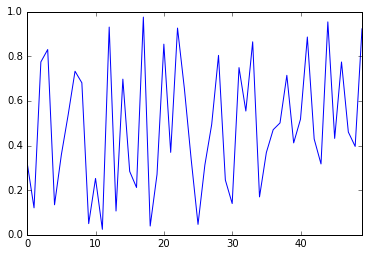

In [74]:
# line chart from Series
pd.Series(np.random.random(50)).plot()

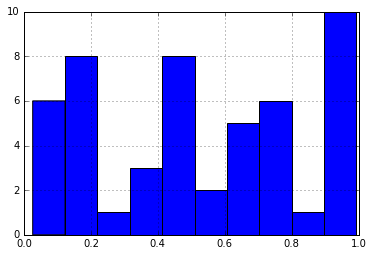

In [75]:
# histogram from Series
pd.Series(np.random.random(50)).hist()

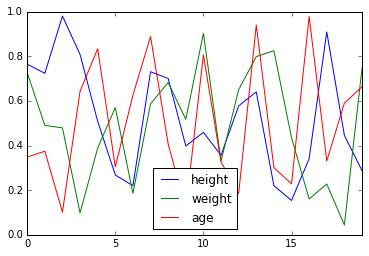

In [76]:
# multiple series charts available from DataFrames
pd.DataFrame(np.random.random((20, 3)), columns=['height', 'weight', 'age']).plot()

### groupby ###

* Mostly does what you'd expect...
* Returns a `GroupBy` object, *not* a Series/DataFrame - need to project what you want first

In [77]:
# Fake dataset for log messages (timestamp skipped for simplicity)
csv = io.StringIO("""
host,service,error
celia,cache-service,OOM
celia,cache-service,OOM
celia,domain-service,segfault
mike,cache-service,OOM
mike,domain-service,segfault
mike,domain-service,OOM
mike,domain-service,segfault
mike,domain-service,segfault
sulley,cache-service,OOM
""")
df = pd.read_csv(csv)
df

,host,service,error
0,celia,cache-service,OOM
1,celia,cache-service,OOM
2,celia,domain-service,segfault
3,mike,cache-service,OOM
4,mike,domain-service,segfault
5,mike,domain-service,OOM
6,mike,domain-service,segfault
7,mike,domain-service,segfault
8,sulley,cache-service,OOM


In [78]:
# does nothing meaningful until you ask for some result (many methods available)
df.groupby('host')

In [79]:
# number of rows per host, as Series
df.groupby('host').size()

host
celia     3
mike      5
sulley    1
dtype: int64

In [80]:
# number of error rows per host per service (as Series with multiple index)
df.groupby(['host', 'service']).size()

host    service       
celia   cache-service     2
        domain-service    1
mike    cache-service     1
        domain-service    4
sulley  cache-service     1
dtype: int64

In [81]:
# group by host, then get number of occurrences of each error type (as Series with multiple index)
df.groupby('host')['error'].value_counts()

host    error   
celia   OOM         2
        segfault    1
mike    segfault    3
        OOM         2
sulley  OOM         1
dtype: int64

In [82]:
# same as above, but get the index of the host, error that occurs most frequently
df.groupby('host')['error'].value_counts().argmax()

('mike', 'segfault')

In [83]:
# get overall number of OOM errors per service
df[df['error'] == 'OOM'].groupby('service')['error'].count()


service
cache-service     4
domain-service    1
Name: error, dtype: int64

<br/>

---

<br/>

### Dates / Times ###

* only familiar with a subset of these, but pandas has a huge number of features related to this
* very heavily used in finance, for e.g. high frequency time series data

In [84]:
csv = io.StringIO("""
where,when
here,2013-01-03T10:37:01
there,1999-06-09T15:01:10
someplace,2005-01-03
""")
df = pd.read_csv(csv)
df

,where,when
0,here,2013-01-03T10:37:01
1,there,1999-06-09T15:01:10
2,someplace,2005-01-03


In [85]:
# usually needs explicit conversion to datetime (but some DataFrame constructors allow
# this to be specified)
df['when'] = pd.to_datetime(df['when'])
df['when']

0   2013-01-03 10:37:01
1   1999-06-09 15:01:10
2   2005-01-03 00:00:00
Name: when, dtype: datetime64[ns]

In [86]:
# attempts to convert strings to datetime for comparisons
df[df['when'] > '1999-07-01']

,where,when
0,here,2013-01-03 10:37:01
2,someplace,2005-01-03 00:00:00


In [87]:
# can be specific for exact datetimes
df[df['when'] == '1999-06-09T15:01:10']

,where,when
1,there,1999-06-09 15:01:10


In [88]:
# or less specific for > or < queries
df[(df['when'] > '1999') & (df['when'] < '2006')]

,where,when
1,there,1999-06-09 15:01:10
2,someplace,2005-01-03 00:00:00


In [89]:
# many things are easier when datetime is the index
df.index = df['when']
df

,where,when
when,,
2013-01-03 10:37:01,here,2013-01-03 10:37:01
1999-06-09 15:01:10,there,1999-06-09 15:01:10
2005-01-03 00:00:00,someplace,2005-01-03 00:00:00


In [90]:
# get component of datetime
df.index.year

array([2013, 1999, 2005], dtype=int32)

In [91]:
# alternative (but much slower)
df['when'].apply(lambda row: row.year)

when
2013-01-03 10:37:01    2013
1999-06-09 15:01:10    1999
2005-01-03 00:00:00    2005
Name: when, dtype: int64

...but probably better methods out there that I don't know about.

...also many methods/functions for:

* filling in gaps between time intervals
* generating time ranges
* resampling 
* grouping based on time
* shifting/lagging time forwards/backwards
* dealing with business quarters, holiday calendars, etc.

<br/>

---

<br/>

## Sample workflow ##

Based one the new summary service.

*Task*: find the priority year between 2000 (inclusive) and 2005 (exclusive) in which Bose patents that were granted in the US or Japan had the highest mean strength score.

In [92]:
# Bose's patfam data, as returned by the domain service
with open('example_data.json') as fhandle:
    print(fhandle.read(2000) + '...')

[{"id":17551624,"accession":"2004322899","title":"Grill for e.g. table-type gas ring for cooking fish, increases heating amount of heater which heats foodstuff in grill chamber when open state of door of grill chamber is detected by sensors","status":"GRANTED","strength":1.206,"priorityDate":1033340400000,"grantedDate":1207090800000,"expiryDate":1664492400000,"grantedTerritories":["JP"]},{"id":8990861,"accession":"2002399332","title":"Gas concentration detector apparatus maintains supply of power to detector when zero point output value of detector deviates from reference value","status":"GRANTED","strength":1.182,"priorityDate":967417200000,"grantedDate":1294185600000,"expiryDate":1598569200000,"grantedTerritories":["JP"]},{"id":18592029,"accession":"2001568966","title":"Combustion equipment has controller that checks if combustion in burner is normal when pressure downstream of pressure adjustment valve is detected to be not within appropriate range","status":"APPLICATION_INACTIVE","

In [93]:
# Read raw JSON text into new DataFrame
df = pd.read_json('example_data.json')
df

,accession,expiryDate,grantedDate,grantedTerritories,id,pendingTerritories,priorityDate,status,strength,title
0,2004322899,1664492400000,1.207091e+12,[JP],17551624,NaN,1033340400000,GRANTED,1.206,Grill for e.g. table-type gas ring for cooking...
1,2002399332,1598569200000,1.294186e+12,[JP],8990861,NaN,967417200000,GRANTED,1.182,Gas concentration detector apparatus maintains...
2,2001568966,1582416000000,NaN,NaN,18592029,[JP],951264000000,APPLICATION_INACTIVE,NaN,Combustion equipment has controller that check...
3,2014T49671,1994371200000,NaN,NaN,24433020,[US],1363219200000,PENDING,NaN,Method for automobile traffic detection of e.g...
4,2007650318,1764979200000,1.240268e+12,"[DE, GB, IT, US]",15974655,NaN,1133827200000,GRANTED,4.763,Power converter system e.g. audio amplifier sy...
5,2003598846,1132185600000,NaN,NaN,8073333,NaN,1011830400000,APPLICATION_DEAD,NaN,Noise reduction method for use in stereo broad...
6,2013L75172,1956787200000,NaN,NaN,3522619,"[AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...",1325635200000,PENDING,NaN,Personal sound system has control that is wire...
7,2001532833,1250636400000,NaN,NaN,17764608,NaN,948153600000,APPLICATION_DEAD,NaN,Abnormal overheating prevention structure for ...
8,2013N29395,1449532800000,NaN,NaN,118801,NaN,1330560000000,APPLICATION_DEAD,NaN,Method for manufacturing air volume control ap...
9,2012M67880,1932850800000,1.407798e+12,"[CN, US]",5664837,NaN,1301698800000,GRANTED,2.261,Micro electromechanical system transducer pack...


In [94]:
# `.info()` always useful to see what columns/datatypes have been inferred
# NOTE: different inferred types of `grantedDate` and `priorityDate`
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2455
Data columns (total 10 columns):
accession             2456 non-null object
expiryDate            2456 non-null int64
grantedDate           1256 non-null float64
grantedTerritories    999 non-null object
id                    2456 non-null int64
pendingTerritories    939 non-null object
priorityDate          2456 non-null int64
status                2456 non-null object
strength              1159 non-null float64
title                 2456 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 211.1+ KB


In [95]:
# default index is numbered from 0, set to pat_fam_id to be more meaningful
df.index = df['id']
df

,accession,expiryDate,grantedDate,grantedTerritories,id,pendingTerritories,priorityDate,status,strength,title
id,,,,,,,,,,
17551624,2004322899,1664492400000,1.207091e+12,[JP],17551624,NaN,1033340400000,GRANTED,1.206,Grill for e.g. table-type gas ring for cooking...
8990861,2002399332,1598569200000,1.294186e+12,[JP],8990861,NaN,967417200000,GRANTED,1.182,Gas concentration detector apparatus maintains...
18592029,2001568966,1582416000000,NaN,NaN,18592029,[JP],951264000000,APPLICATION_INACTIVE,NaN,Combustion equipment has controller that check...
24433020,2014T49671,1994371200000,NaN,NaN,24433020,[US],1363219200000,PENDING,NaN,Method for automobile traffic detection of e.g...
15974655,2007650318,1764979200000,1.240268e+12,"[DE, GB, IT, US]",15974655,NaN,1133827200000,GRANTED,4.763,Power converter system e.g. audio amplifier sy...
8073333,2003598846,1132185600000,NaN,NaN,8073333,NaN,1011830400000,APPLICATION_DEAD,NaN,Noise reduction method for use in stereo broad...
3522619,2013L75172,1956787200000,NaN,NaN,3522619,"[AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...",1325635200000,PENDING,NaN,Personal sound system has control that is wire...
17764608,2001532833,1250636400000,NaN,NaN,17764608,NaN,948153600000,APPLICATION_DEAD,NaN,Abnormal overheating prevention structure for ...
118801,2013N29395,1449532800000,NaN,NaN,118801,NaN,1330560000000,APPLICATION_DEAD,NaN,Method for manufacturing air volume control ap...


In [96]:
# we're only interested in a subset of columns, so get a view on only those
df = df[['grantedTerritories', 'priorityDate', 'strength']]
df

,grantedTerritories,priorityDate,strength
id,,,
17551624,[JP],1033340400000,1.206
8990861,[JP],967417200000,1.182
18592029,NaN,951264000000,NaN
24433020,NaN,1363219200000,NaN
15974655,"[DE, GB, IT, US]",1133827200000,4.763
8073333,NaN,1011830400000,NaN
3522619,NaN,1325635200000,NaN
17764608,NaN,948153600000,NaN
118801,NaN,1330560000000,NaN


In [97]:
# let's skip anything without a strength, or which has no granted territories
df = df.dropna()
df

,grantedTerritories,priorityDate,strength
id,,,
17551624,[JP],1033340400000,1.206
8990861,[JP],967417200000,1.182
15974655,"[DE, GB, IT, US]",1133827200000,4.763
5664837,"[CN, US]",1301698800000,2.261
12812502,"[AL, BE, BG, DE, FR, GB, HU, MK, MT, SI, SM, T...",1268697600000,2.992
9404589,[JP],956271600000,1.110
21856622,[DE],847670400000,0.601
2654223,"[AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...",1309388400000,2.791
9830588,"[DE, FR, GB, IT, JP, US]",955666800000,9.059


In [98]:
# define a function for determining if a grantedTerritories value meets our criteria
def in_us_or_japan(territory_list):
    if 'US' in territory_list or 'JP' in territory_list:
        return True
    return False

# applying to grantedTerritories column returns a boolean Series
keep_row = df['grantedTerritories'].apply(in_us_or_japan)
keep_row

id
17551624     True
8990861      True
15974655     True
5664837      True
12812502     True
9404589      True
21856622    False
2654223      True
9830588      True
7954488      True
21168389     True
18198863    False
20570        True
3649641      True
9969863      True
20775262     True
2990153      True
20820296    False
8003599      True
10481894     True
18768282     True
20947381     True
8274162      True
18076047     True
6979831     False
8835106      True
18776507     True
9039909      True
15261785     True
17891753    False
            ...  
8670980     False
6807526      True
18693776     True
11562784     True
4485079     False
19361460    False
10628918     True
14458697     True
9924407      True
8208347      True
23043833    False
22712061     True
4833250      True
23498449     True
9150256      True
4665222      True
18673373     True
16244516     True
16244515     True
16244514     True
8187806      True
6561666      True
15576861    False
20487880     True
1783779

In [99]:
# index using the boolean Series
df = df[keep_row]
df

,grantedTerritories,priorityDate,strength
id,,,
17551624,[JP],1033340400000,1.206
8990861,[JP],967417200000,1.182
15974655,"[DE, GB, IT, US]",1133827200000,4.763
5664837,"[CN, US]",1301698800000,2.261
12812502,"[AL, BE, BG, DE, FR, GB, HU, MK, MT, SI, SM, T...",1268697600000,2.992
9404589,[JP],956271600000,1.110
2654223,"[AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...",1309388400000,2.791
9830588,"[DE, FR, GB, IT, JP, US]",955666800000,9.059
7954488,[JP],1004400000000,1.118


In [100]:
# (often optional, but useful to make sure...)
# before we start modify this dataframe, make explicit copy - ensure changes aren't made on view or copy
# also saves memory when we no longer need original
df = df.copy()

In [101]:
# next - convert timestamp to datetime
# ...close...but wrong...
pd.to_datetime(df['priorityDate'])

id
17551624   1970-01-01 00:17:13.340400
8990861    1970-01-01 00:16:07.417200
15974655   1970-01-01 00:18:53.827200
5664837    1970-01-01 00:21:41.698800
12812502   1970-01-01 00:21:08.697600
9404589    1970-01-01 00:15:56.271600
2654223    1970-01-01 00:21:49.388400
9830588    1970-01-01 00:15:55.666800
7954488    1970-01-01 00:16:44.400000
21168389   1970-01-01 00:17:47.385600
20570      1970-01-01 00:20:12.015600
3649641    1970-01-01 00:21:54.658800
9969863    1970-01-01 00:16:23.923200
20775262   1970-01-01 00:19:27.350400
2990153    1970-01-01 00:21:19.234800
8003599    1970-01-01 00:16:25.647600
10481894   1970-01-01 00:20:54.697200
18768282   1970-01-01 00:19:39.874800
20947381   1970-01-01 00:15:24.130800
8274162    1970-01-01 00:17:58.444800
18076047   1970-01-01 00:15:36.831600
8835106    1970-01-01 00:16:17.443200
18776507   1970-01-01 00:17:02.626800
9039909    1970-01-01 00:17:34.249200
15261785   1970-01-01 00:18:19.004400
8572987    1970-01-01 00:15:40.806000
4259969  

In [102]:
# our timestamps are in milliseconds, Pandas default is nanosecond precision
df.loc[:, 'priorityDate'] = pd.to_datetime(df['priorityDate'], unit='ms')
df

,grantedTerritories,priorityDate,strength
id,,,
17551624,[JP],2002-09-29 23:00:00,1.206
8990861,[JP],2000-08-27 23:00:00,1.182
15974655,"[DE, GB, IT, US]",2005-12-06 00:00:00,4.763
5664837,"[CN, US]",2011-04-01 23:00:00,2.261
12812502,"[AL, BE, BG, DE, FR, GB, HU, MK, MT, SI, SM, T...",2010-03-16 00:00:00,2.992
9404589,[JP],2000-04-20 23:00:00,1.110
2654223,"[AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...",2011-06-29 23:00:00,2.791
9830588,"[DE, FR, GB, IT, JP, US]",2000-04-13 23:00:00,9.059
7954488,[JP],2001-10-30 00:00:00,1.118


In [103]:
# select only the date range we're interested in (again, ensure we're working with copy)
df = df[(df['priorityDate'] > '2000') & (df['priorityDate'] < '2005')].copy()
df

,grantedTerritories,priorityDate,strength
id,,,
17551624,[JP],2002-09-29 23:00:00,1.206
8990861,[JP],2000-08-27 23:00:00,1.182
9404589,[JP],2000-04-20 23:00:00,1.110
9830588,"[DE, FR, GB, IT, JP, US]",2000-04-13 23:00:00,9.059
7954488,[JP],2001-10-30 00:00:00,1.118
21168389,[US],2003-10-29 00:00:00,2.262
9969863,[US],2001-03-07 00:00:00,2.398
8003599,[US],2001-03-26 23:00:00,2.341
8274162,[JP],2004-03-05 00:00:00,1.408


In [105]:
# we're not interested in exact dates, only years
# (much better/faster ways of doing this using `TimeGrouper` or `resample`)
df['priorityYear'] = df['priorityDate'].apply(lambda priorityDate: priorityDate.year)
df

,grantedTerritories,priorityDate,strength,priorityYear
id,,,,
17551624,[JP],2002-09-29 23:00:00,1.206,2002
8990861,[JP],2000-08-27 23:00:00,1.182,2000
9404589,[JP],2000-04-20 23:00:00,1.110,2000
9830588,"[DE, FR, GB, IT, JP, US]",2000-04-13 23:00:00,9.059,2000
7954488,[JP],2001-10-30 00:00:00,1.118,2001
21168389,[US],2003-10-29 00:00:00,2.262,2003
9969863,[US],2001-03-07 00:00:00,2.398,2001
8003599,[US],2001-03-26 23:00:00,2.341,2001
8274162,[JP],2004-03-05 00:00:00,1.408,2004


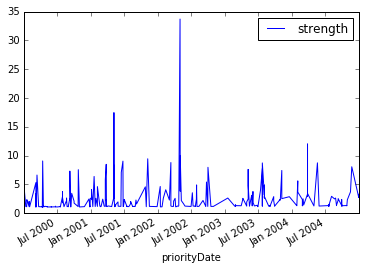

In [108]:
# plot strength vs. time
df.plot(x='priorityDate', y='strength')


In [109]:
# we don't actually need most columns now, so again can filter them out
df = df[['priorityYear', 'strength']]
df

,priorityYear,strength
id,,
17551624,2002,1.206
8990861,2000,1.182
9404589,2000,1.110
9830588,2000,9.059
7954488,2001,1.118
21168389,2003,2.262
9969863,2001,2.398
8003599,2001,2.341
8274162,2004,1.408


In [110]:
# group by year, show number of entries per year
by_year = df.groupby('priorityYear')
print(by_year)
by_year.size()

priorityYear
2000    88
2001    77
2002    47
2003    55
2004    56
dtype: int64

In [108]:
# find mean strength per year
mean_strength_by_year = by_year['strength'].mean()
mean_strength_by_year

priorityYear
2000    6.974625
2001    4.494071
2002    3.819407
2003    6.111200
2004    5.345158
Name: strength, dtype: float64

In [109]:
# find index (i.e. year) where mean strength was maximum
mean_strength_by_year.argmax()

2000

...and we're done. Looks like a lot, but usually operations are chained. Very fast once data is in Series/DataFrames.

<br/>

---

<br/>